# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [2]:
df = pd.read_csv('./data/college_completion.csv', low_memory=False)
print(df.columns.tolist(), df.shape)

['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control', 'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count', 'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value', 'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value', 'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile', 'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile', 'endow_value', 'endow_percentile', 'grad_100_value', 'grad_100_percentile', 'grad_150_value', 'grad_150_percentile', 'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile', 'ft_fac_value', 'ft_fac_percentile', 'vsa_year', 'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first', 'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first', 'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first', 'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first', 'vsa_grad_after4_transfer', 'vsa_grad_elsewhere_after4_transfer', 'vsa_enroll_after4_transfer', 'vs

2. There are 3,798 observations and 63 different variables. The variables inclued city, state, the number of students, among many others.

In [3]:
#Part 3
crosstab = pd.crosstab(df['control'], df['level'])
print(crosstab)

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632


> I see that for Private for-profit and public controls are distributed fairly evenly across 2 and 4 year programs while Private not-for-profit is almost entirely made up of 4 year programs. A majority of prgrams are 4 year private not-for-profit, with second most being public 2 year.

<Axes: xlabel='grad_100_value', ylabel='Count'>

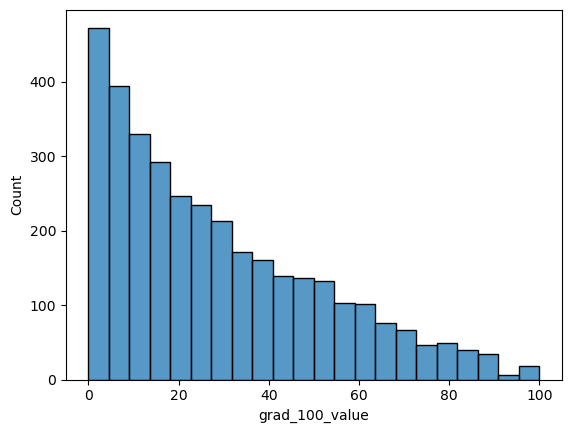

In [4]:
#Part 4
sns.histplot(df['grad_100_value'])

<Axes: xlabel='grad_100_value', ylabel='Density'>

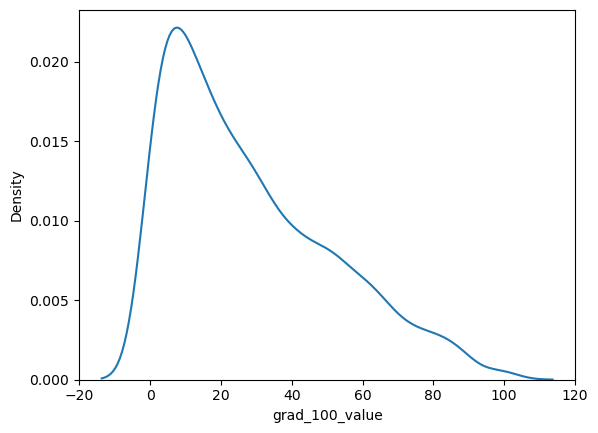

In [5]:
sns.kdeplot(df['grad_100_value'])

<Axes: >

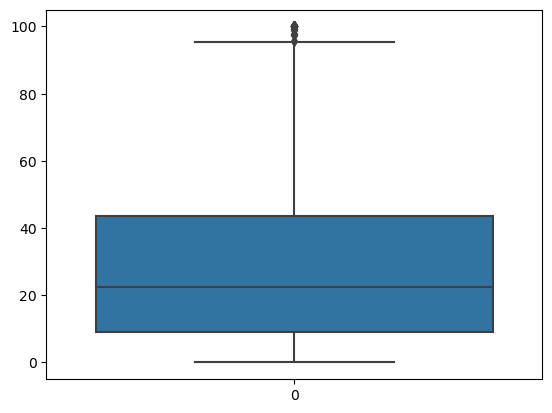

In [6]:
sns.boxplot(df['grad_100_value'])

In [7]:
df['grad_100_value'].describe()

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64

<Axes: xlabel='grad_100_value', ylabel='Density'>

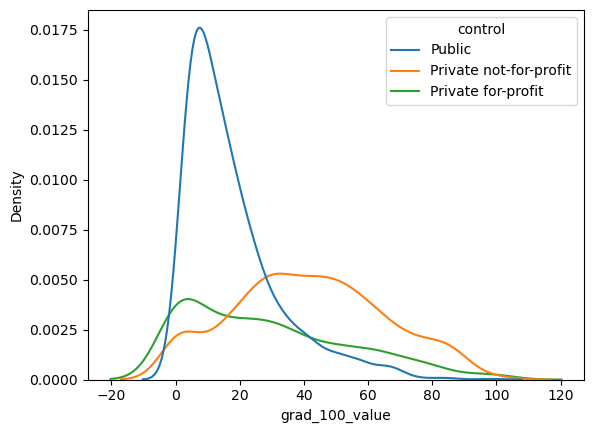

In [8]:
#Part 5
sns.kdeplot(data=df,x='grad_100_value',hue='control')

<Axes: xlabel='grad_100_value', ylabel='Density'>

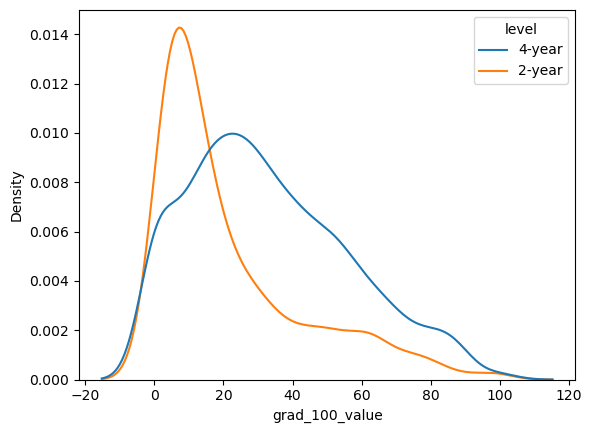

In [9]:
sns.kdeplot(data=df,x='grad_100_value',hue='level')

> It appears that 4 year programs have more density on higher graduation rates and the same for private not-for-profit.

In [10]:
df.loc[:,['control', 'grad_100_value']].groupby(['control']).describe()

grad_100_value                                          \
                                count       mean        std  min    25%   50%   
control                                                                         
Private for-profit              779.0  29.108858  25.601687  0.0   6.95  24.7   
Private not-for-profit         1189.0  41.660976  23.551231  0.0  25.00  41.0   
Public                         1499.0  17.430887  14.729443  0.0   6.90  13.2   

                                      
                          75%    max  
control                               
Private for-profit      46.75  100.0  
Private not-for-profit  58.30  100.0  
Public                  23.25   97.8

In [11]:
df.loc[:,['level', 'grad_100_value']].groupby(['level']).describe()

grad_100_value                                                      
                count       mean        std  min   25%   50%     75%    max
level                                                                      
2-year         1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year         2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0

> 4 year programs and private not-for-profit have higher graduation rates on average than the rest

<Axes: xlabel='grad_100_value', ylabel='Density'>

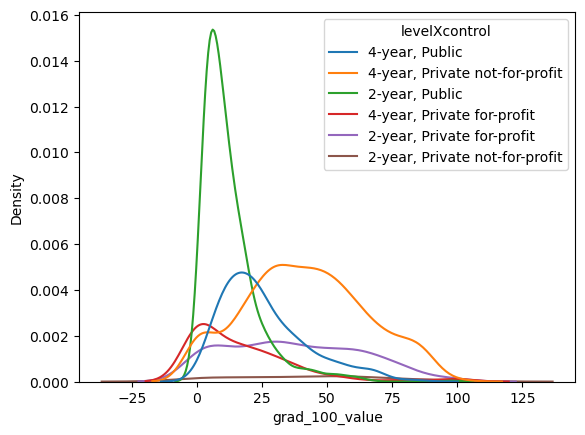

In [12]:
#PART 6

df['levelXcontrol']=df['level']+', '+df['control']
sns.kdeplot(data=df,x='grad_100_value',hue='levelXcontrol')

> 4 year private not-for-profit programs have the highest density at higher values of graduation rates and thus highest graduation rates. 

<Axes: xlabel='aid_value', ylabel='Density'>

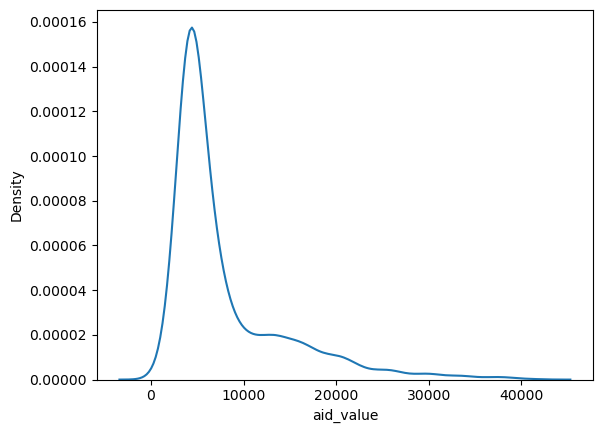

In [13]:
#Part 7

sns.kdeplot(data=df,x='aid_value')

<Axes: xlabel='aid_value', ylabel='Density'>

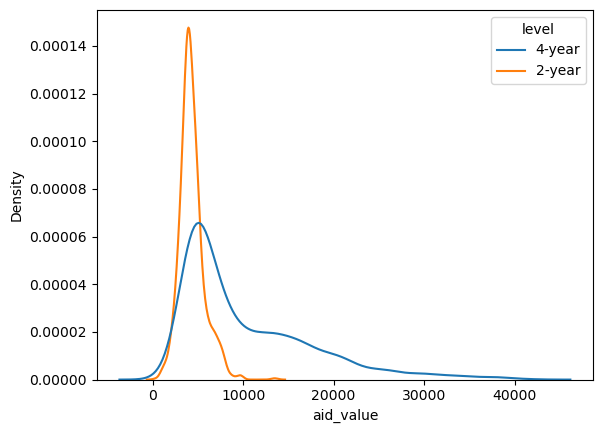

In [14]:
sns.kdeplot(data=df,x='aid_value', hue='level')

<Axes: xlabel='aid_value', ylabel='Density'>

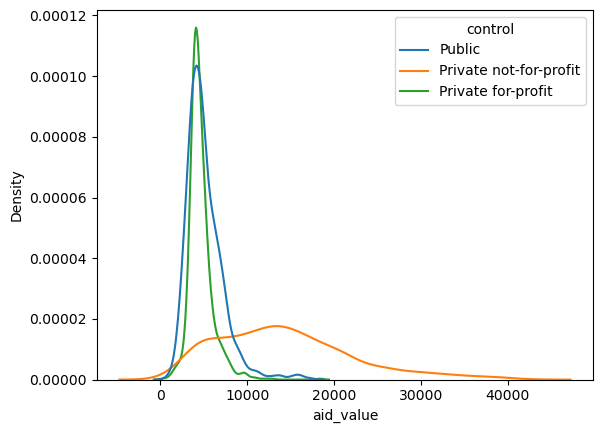

In [15]:
sns.kdeplot(data=df,x='aid_value', hue='control')

In [16]:
df.loc[:,['control', 'aid_value']].groupby(['control']).describe()

aid_value                                             \
                           count          mean          std    min      25%   
control                                                                       
Private for-profit         991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit    1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                    1558.0   5094.835687  2136.436370  881.0  3725.25   

                                                   
                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5  18355.0  
Private not-for-profit  13322.0  18571.0  41580.0  
Public                   4667.0   6087.5  17299.0

In [17]:
df.loc[:,['level', 'aid_value']].groupby(['level']).describe()

aid_value                                                             \
           count          mean          std    min     25%     50%      75%   
level                                                                         
2-year    1458.0   4310.878601  1384.045631  294.0  3485.5  4113.0   4890.0   
4-year    2339.0  10235.379222  7227.369167  902.0  4830.5  7222.0  14046.0   

                 
            max  
level            
2-year  13654.0  
4-year  41580.0

> Public and for-profit give the most aid as shown in the graph that takes into account control. The graph that takes into account level shows that 4-year institutions give more aid, but that seems pretty obivious as those programs consist of more schooling. 

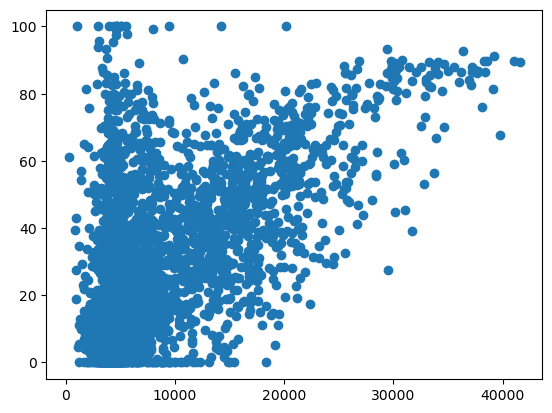

In [18]:
#Part 8

plt.scatter(df['aid_value'], df['grad_100_value'])

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

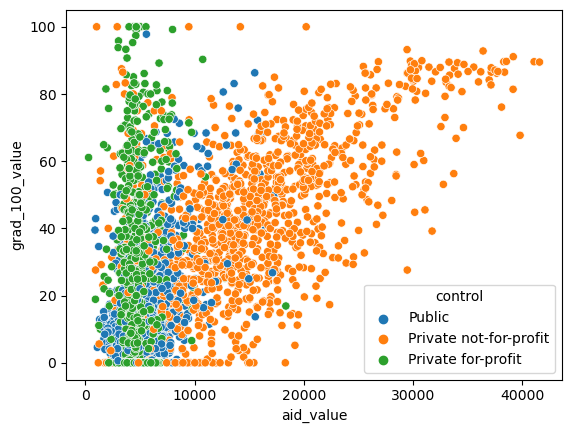

In [19]:

sns.scatterplot(data=df,x='aid_value',y='grad_100_value',hue='control')

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

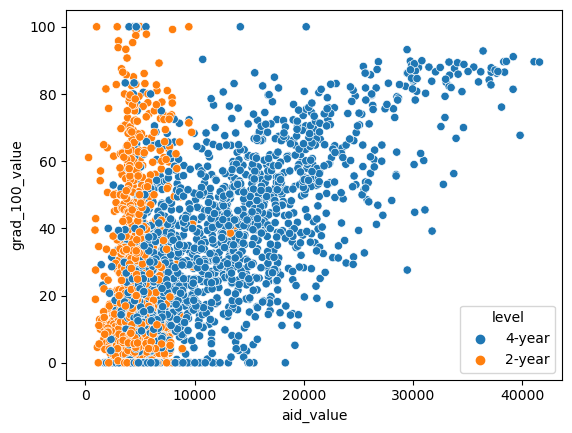

In [20]:
sns.scatterplot(data=df,x='aid_value',y='grad_100_value',hue='level')

> I found positive correlations in graduation rate and aid value for 4 year programs and Private not-for-profit programs from their respective plots. For the other groups, they give lower level of aid across all types of graduation rates.

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [21]:
#PART 1
bnb = pd.read_csv('./data/airbnb_hw.csv', low_memory=False)

In [22]:
price = bnb['Price']
price = price.str.replace(',','') #getting rid of the commas in numbers over 999
price = pd.to_numeric(price,errors='coerce') #converting all the values to numerics
bnb['Price'] = price
del price
print(bnb['Price'].unique(), '\n')
print(sum(bnb['Price']))

[  145    37    28   199   549   149   250    90   270   290   170    59
    49    68   285    75   100   150   700   125   175    40    89    95
    99   499   120    79   110   180   143   230   350   135    85    60
    70    55    44   200   165   115    74    84   129    50   185    80
   190   140    45    65   225   600   109  1990    73   240    72   105
   155   160    42   132   117   295   280   159   107    69   239   220
   399   130   375   585   275   139   260    35   133   300   289   179
    98   195    29    27    39   249   192   142   169  1000   131   138
   113   122   329   101   475   238   272   308   126   235   315   248
   128    56   207   450   215   210   385   445   136   247   118    77
    76    92   198   205   299   222   245   104   153   349   114   320
   292   226   420   500   325   307    78   265   108   123   189    32
    58    86   219   800   335    63   229   425    67    87  1200   158
   650   234   310   695   400   166   119    62   

In [23]:
#Part 2
print(bnb.head(), bnb.shape, bnb.columns.tolist())

    Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                Sunny Room in Harlem      Manhattan   
3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008            Trendy Times Square Loft      Manhattan   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0     Apartment                         NaN  Entire home/apt  11249.0   1.0   
1     Apartment                         NaN     Private room  11206.0   1.0   
2     Apartment                         NaN     Private room  10032.0   1.0   
3     Apartment                         NaN  Entire home/apt  10024.0   3.0   
4     Apartment                        95.0     Private room  10036.0   3.0   

   Number of Records  Number Of Reviews  Price  Review Scores 

> There are 30478 observations and 13 different variables

In [24]:
#Part 3
bnb_crosstab = pd.crosstab(bnb['Room Type'], bnb['Property Type'])
bnb_crosstab

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


> I see that there are mostly apartments and houses for rent on Airbmb. Shared room is definitely the least popular room type while entire home/apt is most popular (and private room comes in a close second). Private rooms are most popular when renting a house, B&B, or dorm.

<Axes: xlabel='Price', ylabel='Count'>

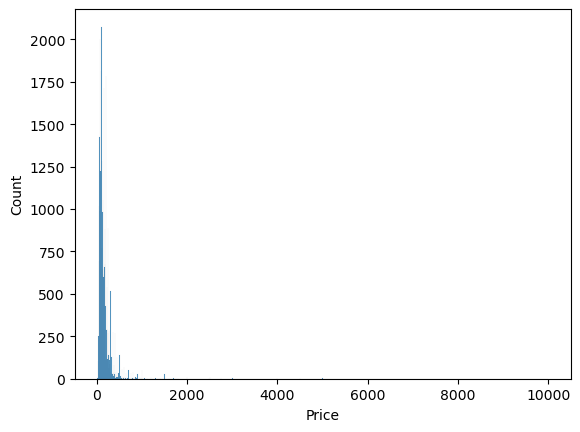

In [25]:
#Part 4
sns.histplot(data=bnb,x='Price')

<Axes: xlabel='Price', ylabel='Density'>

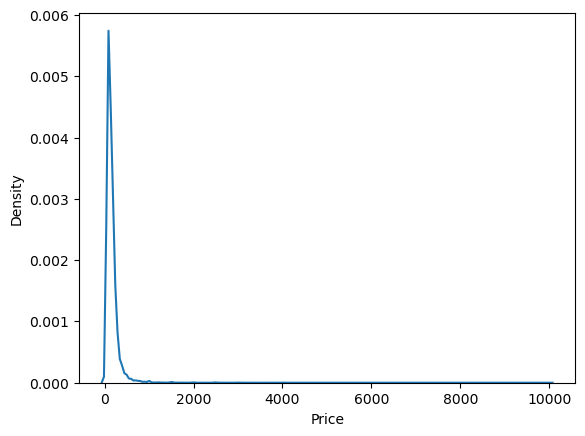

In [26]:
sns.kdeplot(data=bnb,x='Price')

<Axes: xlabel='Price'>

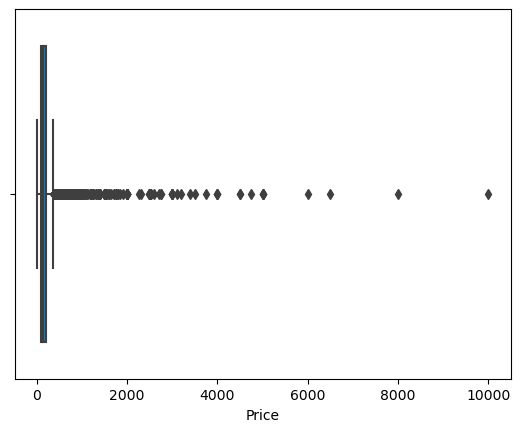

In [27]:
sns.boxplot(data=bnb,x='Price')

In [28]:
bnb['Price'].describe()

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64

In [29]:
bnb['Price_log'] = np.log(bnb['Price'])

<Axes: xlabel='Price_log', ylabel='Count'>

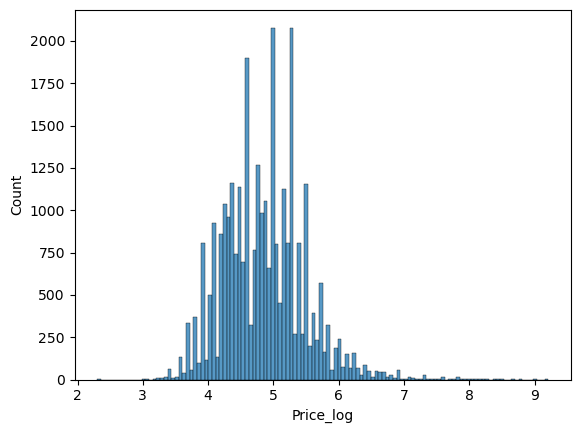

In [30]:
sns.histplot(data=bnb,x='Price_log')

<Axes: xlabel='Price_log', ylabel='Density'>

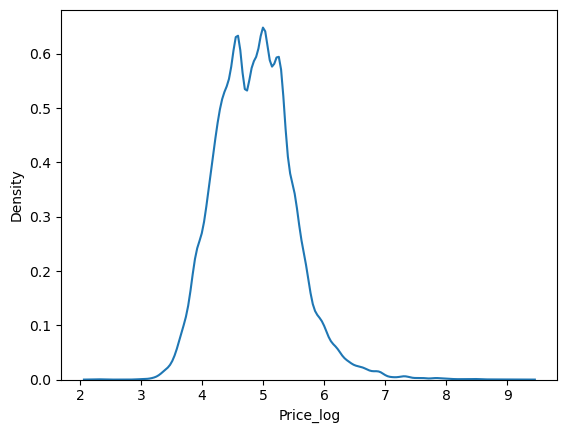

In [31]:
sns.kdeplot(data=bnb,x='Price_log')

<Axes: xlabel='Price_log'>

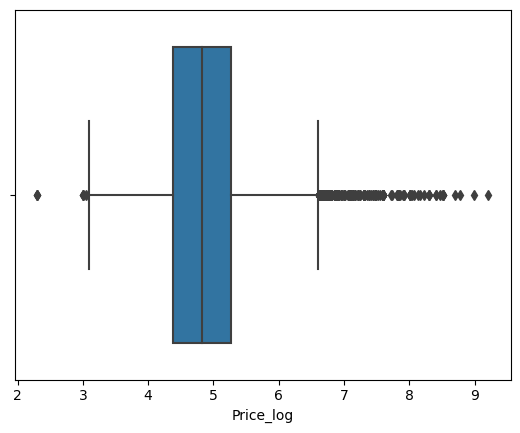

In [32]:
sns.boxplot(data=bnb,x='Price_log')

In [33]:
bnb['Price_log'].describe()

count    30478.000000
mean         4.860495
std          0.627704
min          2.302585
25%          4.382027
50%          4.828314
75%          5.273000
max          9.210340
Name: Price_log, dtype: float64

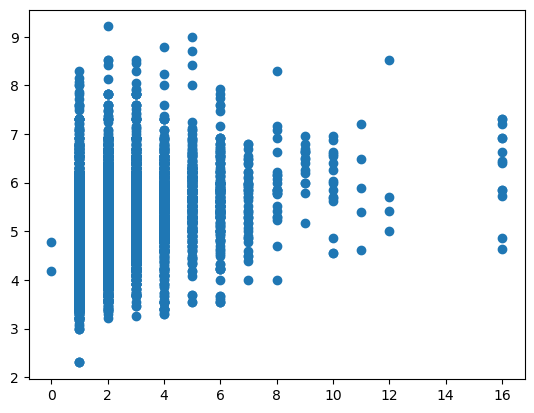

In [34]:
#Part 5
plt.scatter(data=bnb, x='Beds', y='Price_log')

In [35]:
bnb.loc[:,['Beds','Price']].groupby('Beds').describe()

Price                                                           \
        count         mean          std    min     25%    50%      75%   
Beds                                                                     
0.0       2.0    92.000000    38.183766   65.0   78.50   92.0   105.50   
1.0   20344.0   127.673810   107.047827   10.0   75.00  100.0   155.00   
2.0    6610.0   199.061271   225.706318   25.0  115.00  160.0   225.00   
3.0    2071.0   268.118300   303.106942   26.0  140.00  200.0   300.00   
4.0     783.0   315.332056   353.184402   27.0  150.00  247.0   375.00   
5.0     284.0   411.500000   672.610659   35.0  189.75  290.0   450.00   
6.0     177.0   401.768362   417.018431   35.0  199.00  275.0   425.00   
7.0      45.0   341.377778   220.116631   55.0  177.00  300.0   445.00   
8.0      24.0   589.041667   793.054934   55.0  243.75  350.0   481.25   
9.0      15.0   618.000000   233.649616  175.0  447.50  650.0   762.50   
10.0     16.0   480.187500   296.820534   95.0  291.00  407.5   706.25   
11.0      5.0   535.800000   499.217588  100.0  220.00  359.0   650.00   
12.0      4.0  1418.750000  2388.285211  150.0  206.25  262.5  1475.00   
16.0     13.0   736.000000   496.804287  104.0  350.00  625.0  1000.00   

               
          max  
Beds           
0.0     119.0  
1.0    4000.0  
2.0   10000.0  
3.0    5000.0  
4.0    6500.0  
5.0    8000.0  
6.0    2750.0  
7.0     900.0  
8.0    4000.0  
9.0    1050.0  
10.0   1050.0  
11.0   1350.0  
12.0   5000.0  
16.0   1500.0

> I see that there is some pattern of increase in the mean with increases in bed, however, there are some spots where that is not true. The standard deviaion is fairly variable as the number of beds increases. The scatter plot shows that there are fairly big differences in price among every number of beds, however, this difference gets smaller when the number of beds is increased. 

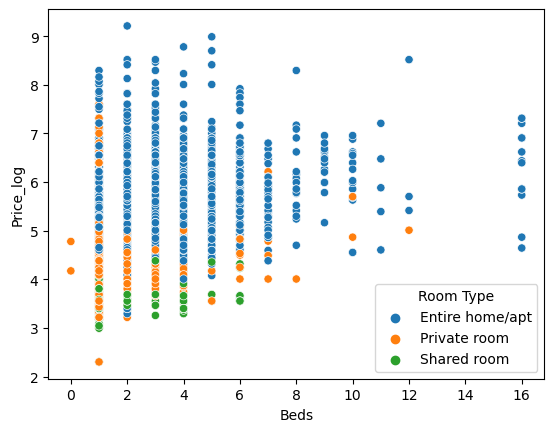

In [36]:
#Part 6

sns.scatterplot(data=bnb,x='Beds',y='Price_log',hue='Room Type');

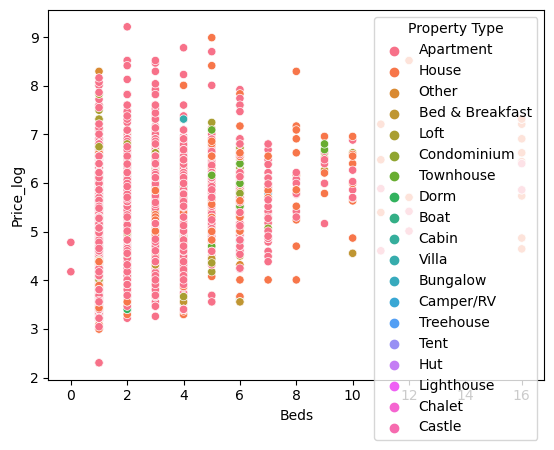

In [37]:
sns.scatterplot(data=bnb,x='Beds',y='Price_log',hue='Property Type');

In [38]:
bnb.loc[:,['Price','Room Type']].groupby('Room Type').describe()

Price                                                     \
                   count        mean         std   min    25%    50%    75%   
Room Type                                                                     
Entire home/apt  17024.0  220.796346  242.222346  10.0  135.0  175.0  240.0   
Private room     12609.0   91.919740   67.119678  10.0   65.0   80.0  100.0   
Shared room        845.0   80.514793  110.756196  10.0   45.0   60.0   85.0   

                          
                     max  
Room Type                 
Entire home/apt  10000.0  
Private room      3000.0  
Shared room       2500.0

In [39]:
bnb.loc[:,['Price','Property Type']].groupby('Property Type').describe()

Price                                                \
                   count        mean         std    min     25%    50%   
Property Type                                                            
Apartment        27102.0  162.045642  181.376882   10.0   85.00  130.0   
Bed & Breakfast    180.0  106.572222   84.701977   30.0   65.00   87.5   
Boat                 8.0  153.625000   49.231051  100.0  120.00  137.5   
Bungalow             4.0  150.750000   46.464144   87.0  133.50  160.5   
Cabin                2.0  165.000000  120.208153   80.0  122.50  165.0   
Camper/RV            7.0  103.571429  102.343958   39.0   47.00   49.0   
Castle               1.0  150.000000         NaN  150.0  150.00  150.0   
Chalet               1.0   99.000000         NaN   99.0   99.00   99.0   
Condominium         94.0  256.585106  249.357946   46.0  131.25  175.0   
Dorm                31.0   76.354839   42.424481   30.0   52.50   65.0   
House             2090.0  156.722967  307.116948   10.0   60.00   85.0   
Hut                  2.0   75.000000   35.355339   50.0   62.50   75.0   
Lighthouse           1.0   39.000000         NaN   39.0   39.00   39.0   
Loft               753.0  221.960159  271.958145   30.0   80.00  140.0   
Other               47.0  394.659574  696.663423   39.0   82.50  135.0   
Tent                 4.0  126.250000   94.989034   40.0   58.75  107.5   
Townhouse          136.0  203.933824  264.178901   45.0   89.50  135.0   
Treehouse            4.0  149.500000  100.520313   95.0   95.00  101.5   
Villa                8.0  328.000000  479.888975   60.0  107.50  187.5   

                                  
                    75%      max  
Property Type                     
Apartment        195.00  10000.0  
Bed & Breakfast  125.00    900.0  
Boat             178.50    250.0  
Bungalow         177.75    195.0  
Cabin            207.50    250.0  
Camper/RV        109.00    325.0  
Castle           150.00    150.0  
Chalet            99.00     99.0  
Condominium      298.75   1990.0  
Dorm              80.00    200.0  
House            150.00   8000.0  
Hut               87.50    100.0  
Lighthouse        39.00     39.0  
Loft             240.00   3000.0  
Other            378.00   4000.0  
Tent             175.00    250.0  
Townhouse        206.25   2500.0  
Treehouse        156.00    300.0  
Villa            224.75   1500.0

> The entire home/apt room types have the highest prices on average and highest standard deviation, while the apartments and houses property types have the highest prices on average and villas have the highest standard deviation. With the great outliers across property and room types, the median appears to be the most reliable estimate of central tendency. 

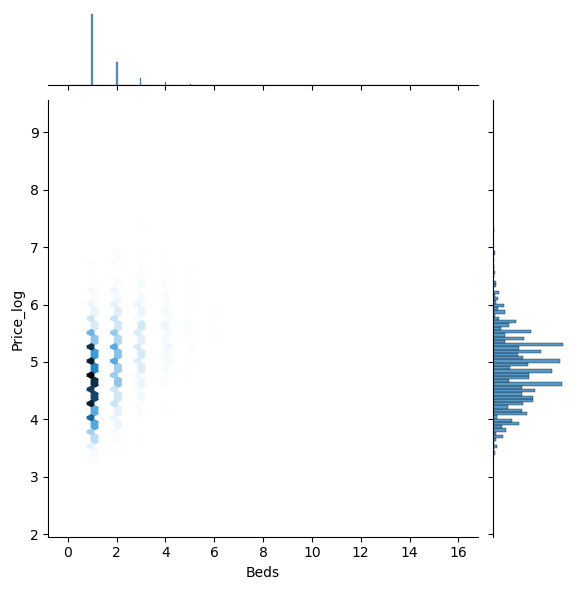

In [40]:
#PART 7

sns.jointplot(data=bnb,x='Beds',y='Price_log',kind='hex')

> Most of the data is distributed across 1 or 2 beds with almost none above the 5 bed mark. Most of the prices are between 3.5 and 6.5 log points. This makes me rethink the prior graphs as they were subject to the outliers that caused it to make it seem like a lot more properties had more beds and were found at higher prices. 

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

In [41]:
#Part 1
cbo = pd.read_csv('./data/cbo_data.csv', low_memory=False)
cbo

,Adjusted Family Cash Income Decile,Number of Families,Number of Individuals,Family Cash Income,Total Federal Taxes,Individual Income Taxes,Corporate Income Taxes,Payroll Taxes,Excises and Customs Duties,Estate and Gift Taxes
0,0 to 10,17.3,21.8,89.5,0.9,-7.7,0.4,6.1,2.2,0.0
1,10 to 20,17.8,32.1,297.0,-14.1,-39.3,1.0,21.3,3.0,0.0
2,20 to 30,17.8,34.4,446.2,-2.6,-43.2,1.5,35.4,3.7,0.0
3,30 to 40,17.8,33.6,595.1,27.0,-29.3,2.5,49.1,4.7,0.0
4,40 to 50,17.8,33.8,798.7,68.5,-9.0,4.1,67.0,6.4,0.0
5,50 to 60,17.8,34.2,1066.9,121.0,17.6,6.8,88.1,8.4,0.0
6,60 to 70,17.8,35.3,1403.5,187.9,50.0,10.5,116.3,11.1,0.0
7,70 to 80,17.8,36.8,1860.8,295.6,104.6,15.5,160.3,15.2,0.0
8,80 to 90,17.8,37.8,2568.7,484.1,210.6,25.1,226.9,21.5,0.0
9,90 to 100,17.8,38.8,7337.3,1848.8,1211.4,175.0,383.0,61.1,18.3


<Axes: xlabel='Individual Income Taxes', ylabel='Adjusted Family Cash Income Decile'>

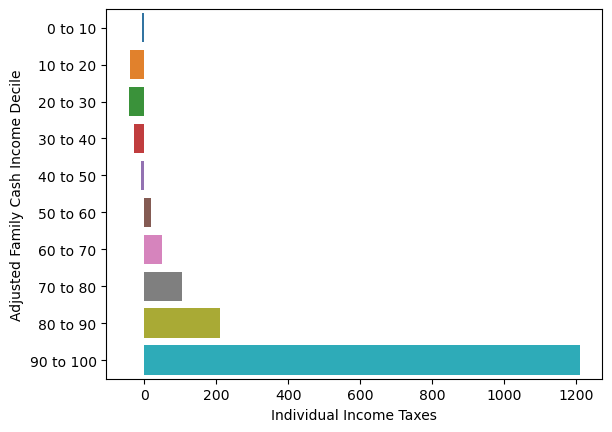

In [42]:
#Part 2
sns.barplot(data=cbo,x='Individual Income Taxes', y='Adjusted Family Cash Income Decile')

> The graph shows individual income taxes to be negative from 0 to 50 and positive from 50-100, with the 90 to 100 group havin gby far the largest. The negatives are because taxpayers with income below a certain threshold receive refundable tax credits equal to the difference

<Axes: xlabel='Total Federal Taxes', ylabel='Adjusted Family Cash Income Decile'>

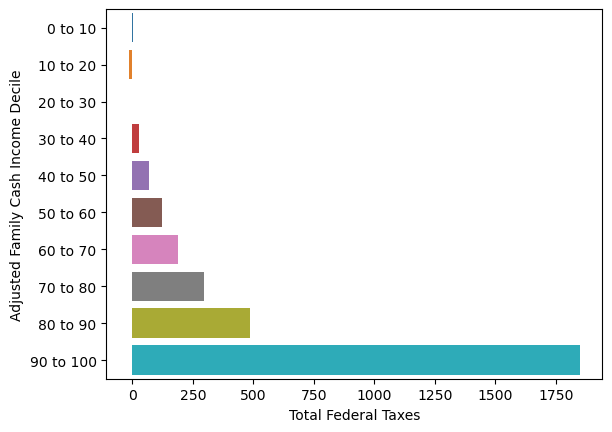

In [43]:
#PART 3
sns.barplot(data=cbo,x='Total Federal Taxes', y='Adjusted Family Cash Income Decile')

> 0 through 30 are paying net negative amounts and 30 through 100 are paying net positive amounts. 

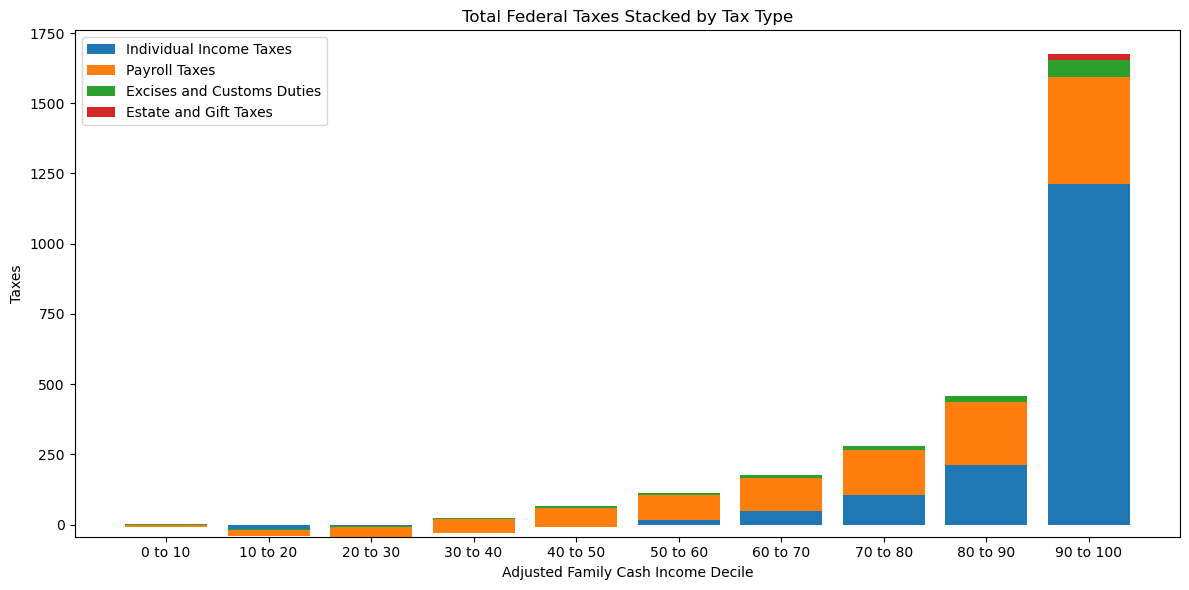

In [44]:
#PART 4
plt.figure(figsize=(12, 6))
plt.bar(cbo['Adjusted Family Cash Income Decile'], cbo['Individual Income Taxes'], label='Individual Income Taxes')
plt.bar(cbo['Adjusted Family Cash Income Decile'], cbo['Payroll Taxes'], bottom=cbo['Individual Income Taxes'], label='Payroll Taxes')
plt.bar(cbo['Adjusted Family Cash Income Decile'], cbo['Excises and Customs Duties'], 
        bottom=cbo['Individual Income Taxes'] + cbo['Payroll Taxes'], label='Excises and Customs Duties')
plt.bar(cbo['Adjusted Family Cash Income Decile'], cbo['Estate and Gift Taxes'], 
        bottom=cbo['Individual Income Taxes'] + cbo['Payroll Taxes'] + cbo['Excises and Customs Duties'], 
        label='Estate and Gift Taxes')
plt.xlabel('Adjusted Family Cash Income Decile')
plt.ylabel('Taxes')
plt.title('Total Federal Taxes Stacked by Tax Type')
plt.legend()
plt.tight_layout()
plt.show()

> Individual income, Excises and Customs Duties, and Payroll taxes all increase as it moves through the income deciles. Estate and Gift taxes only exist in the highest income decile.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them? 
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

In [45]:
#Part 1
medi = pd.read_csv('./data/Medicare Monthly Enrollment Data_Sept2024.csv', low_memory=False)
medi

,YEAR,MONTH,BENE_GEO_LVL,BENE_STATE_ABRVTN,BENE_STATE_DESC,BENE_COUNTY_DESC,BENE_FIPS_CD,TOT_BENES,ORGNL_MDCR_BENES,MA_AND_OTH_BENES,...,B_TOT_BENES,B_ORGNL_MDCR_BENES,B_MA_AND_OTH_BENES,PRSCRPTN_DRUG_TOT_BENES,PRSCRPTN_DRUG_PDP_BENES,PRSCRPTN_DRUG_MAPD_BENES,PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES,PRSCRPTN_DRUG_FULL_LIS_BENES,PRSCRPTN_DRUG_PARTIAL_LIS_BENES,PRSCRPTN_DRUG_NO_LIS_BENES
0,2013,Year,National,US,National,Total,,52425659,37613096,14812563,...,47959444,33147099,14812345,35679758,22661451,13018307,10000861,1030113.0,409204.0,24239580
1,2013,Year,State,AL,Alabama,Total,01,921477.0,711448.0,210029.0,...,862992.0,652965.0,210026.0,637247.0,437749.0,199498.0,205496.0,32790.0,11452.0,387510.0
2,2013,Year,County,AL,Alabama,Autauga County,01001,9323.0,6484.0,2840.0,...,8742.0,5902.0,2840.0,6036.0,3268.0,2767.0,1839.0,296.0,105.0,3796.0
3,2013,Year,County,AL,Alabama,Baldwin County,01003,41033.0,28775.0,12258.0,...,38651.0,26393.0,12258.0,27352.0,15593.0,11759.0,5276.0,867.0,379.0,20830.0
4,2013,Year,County,AL,Alabama,Barbour County,01005,5847.0,5036.0,810.0,...,5515.0,4704.0,810.0,4170.0,3410.0,759.0,1783.0,304.0,73.0,2009.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497013,2024,June,County,VI,Virgin Islands,St. John Island,78020,936.0,742.0,194.0,...,867.0,673.0,194.0,511.0,324.0,187.0,13.0,0.0,0.0,498.0
497014,2024,June,County,VI,Virgin Islands,St. Thomas Island,78030,9829.0,6656.0,3173.0,...,8942.0,5770.0,3172.0,5891.0,2747.0,3144.0,175.0,*,*,5707.0
497015,2024,June,County,VI,Virgin Islands,Unknown,78999,*,*,*,...,*,*,*,*,*,*,*,*,*,*
497016,2024,June,State,UK,Unknown,Unknown,99,*,*,*,...,*,*,*,*,*,*,*,*,*,*


In [46]:
medi.columns.tolist()

['YEAR',
 'MONTH',
 'BENE_GEO_LVL',
 'BENE_STATE_ABRVTN',
 'BENE_STATE_DESC',
 'BENE_COUNTY_DESC',
 'BENE_FIPS_CD',
 'TOT_BENES',
 'ORGNL_MDCR_BENES',
 'MA_AND_OTH_BENES',
 'AGED_TOT_BENES',
 'AGED_ESRD_BENES',
 'AGED_NO_ESRD_BENES',
 'DSBLD_TOT_BENES',
 'DSBLD_ESRD_AND_ESRD_ONLY_BENES',
 'DSBLD_NO_ESRD_BENES',
 'MALE_TOT_BENES',
 'FEMALE_TOT_BENES',
 'WHITE_TOT_BENES',
 'BLACK_TOT_BENES',
 'API_TOT_BENES',
 'HSPNC_TOT_BENES',
 'NATIND_TOT_BENES',
 'OTHR_TOT_BENES',
 'AGE_LT_25_BENES',
 'AGE_25_TO_44_BENES',
 'AGE_45_TO_64_BENES',
 'AGE_65_TO_69_BENES',
 'AGE_70_TO_74_BENES',
 'AGE_75_TO_79_BENES',
 'AGE_80_TO_84_BENES',
 'AGE_85_TO_89_BENES',
 'AGE_90_TO_94_BENES',
 'AGE_GT_94_BENES',
 'DUAL_TOT_BENES',
 'FULL_DUAL_TOT_BENES',
 'PART_DUAL_TOT_BENES',
 'NODUAL_TOT_BENES',
 'A_B_TOT_BENES',
 'A_B_ORGNL_MDCR_BENES',
 'A_B_MA_AND_OTH_BENES',
 'A_TOT_BENES',
 'A_ORGNL_MDCR_BENES',
 'A_MA_AND_OTH_BENES',
 'B_TOT_BENES',
 'B_ORGNL_MDCR_BENES',
 'B_MA_AND_OTH_BENES',
 'PRSCRPTN_DRUG_TOT_BENES

In [47]:
medi['AGE_GT_94_BENES']

0         632839.0
1           7840.0
2             67.0
3            259.0
4             65.0
            ...   
497013           *
497014        97.0
497015           *
497016           *
497017     21444.0
Name: AGE_GT_94_BENES, Length: 497018, dtype: object

In [51]:
medi['AGE_LT_25_BENES']

0         121178.0
1           2717.0
2             23.0
3             73.0
4             30.0
            ...   
497013         0.0
497014           *
497015           *
497016           *
497017       125.0
Name: AGE_LT_25_BENES, Length: 497018, dtype: object

#Part 2
> This data does document how missings are handled. For categorical variables, it simply says "unknown", and for numeric variables it has a "*". This data is not very clean.

In [52]:
#Part 3
bene = medi['AGE_GT_94_BENES']
bene = bene.replace('*',np.nan) #getting rid of the astrix for missing values
bene = pd.to_numeric(bene,errors='coerce') #converting all the values to numerics
medi['AGE_GT_94_BENES'] = bene
del bene
print(medi['AGE_GT_94_BENES'].unique(), '\n')
print(sum(medi['AGE_GT_94_BENES']))

bene = medi['AGE_LT_25_BENES']
bene = bene.replace('*',np.nan) #getting rid of the astrix for missing values
bene = pd.to_numeric(bene,errors='coerce') #converting all the values to numerics
medi['AGE_LT_25_BENES'] = bene
del bene
print(medi['AGE_LT_25_BENES'].unique(), '\n')
print(sum(medi['AGE_LT_25_BENES']))

[6.32839e+05 7.84000e+03 6.70000e+01 ... 1.48250e+04 1.00560e+04
 2.14440e+04] 

nan
[1.21178e+05 2.71700e+03 2.30000e+01 ... 1.24900e+03 3.29300e+03
 5.11800e+03] 

nan


> I chose to look at the number of beneficiaries over the age of 94, and under the age of 25 in each state for Medicare as I was curious to see how insured the oldest and youngest people in our nation were. 

/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Over 94 Log'>

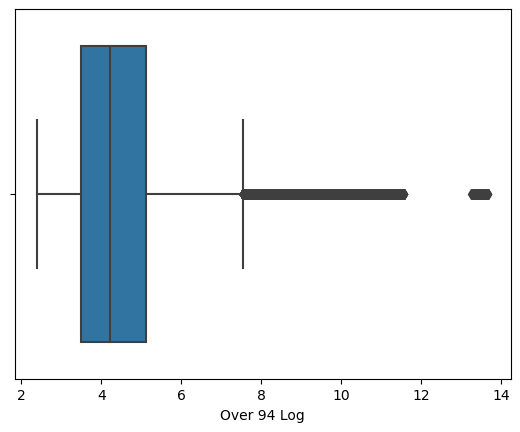

In [49]:
#Part 4
medi['Over 94 Log'] = np.log(medi['AGE_GT_94_BENES'])
sns.boxplot(data=medi,x='Over 94 Log')

/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


<Axes: xlabel='Over 94 Log', ylabel='BENE_STATE_ABRVTN'>

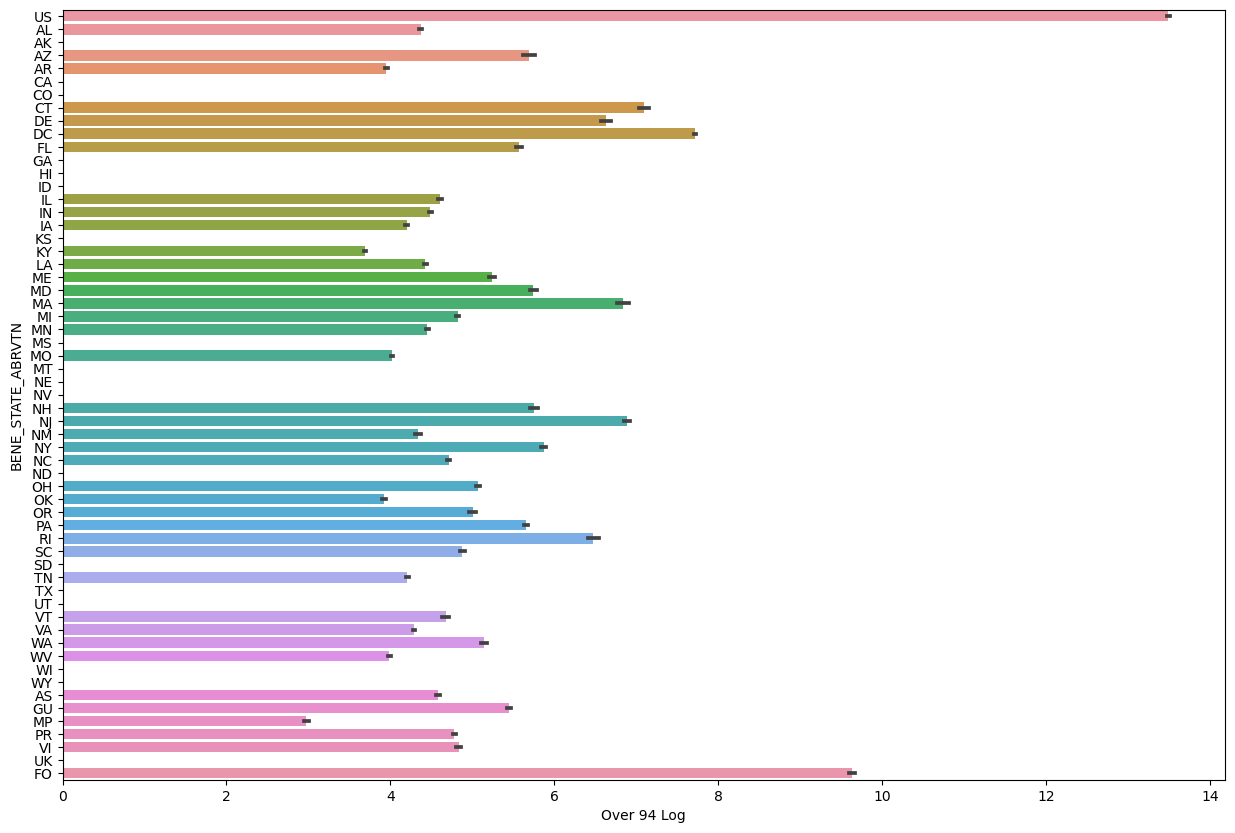

In [50]:
plt.figure(figsize=(15, 10)) 
sns.barplot(data=medi,x='Over 94 Log', y='BENE_STATE_ABRVTN')

/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='under 25 Log'>

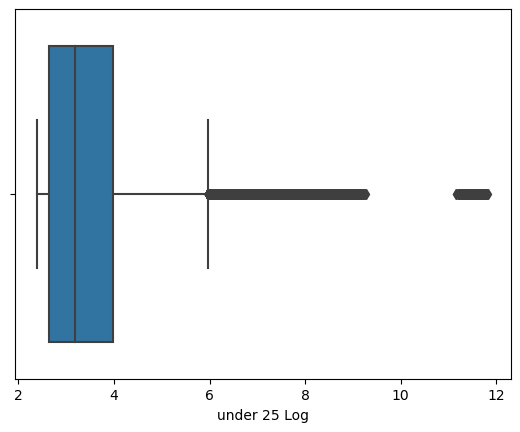

In [54]:
medi['under 25 Log'] = np.log(medi['AGE_LT_25_BENES'])
sns.boxplot(data=medi,x='under 25 Log')

/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


<Axes: xlabel='under 25 Log', ylabel='BENE_STATE_ABRVTN'>

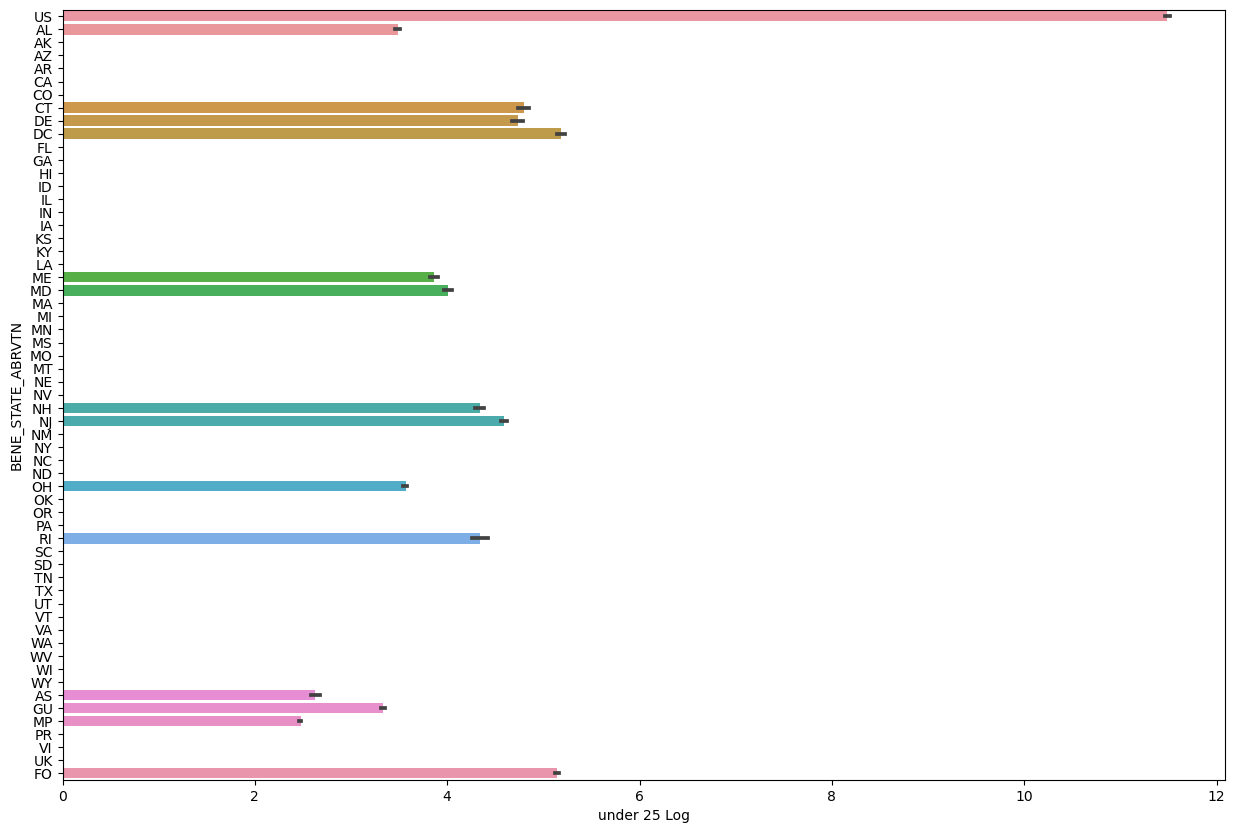

In [55]:
plt.figure(figsize=(15, 10)) 
sns.barplot(data=medi,x='under 25 Log', y='BENE_STATE_ABRVTN')

> There are a good deal of outliers, but some of them make sense. For example, the largest outlier I found ended up being because it was tied to the number of beneficiaries from the United States (or the total across all the states so it makes sense that it was much higher than the rest. It was also interesting to see the UK and Faroe Islands included in this. What was interesting was for the beneficiaries under 25, there were way more states without a single beneficiary. 

<Axes: xlabel='Over 94 Log', ylabel='Count'>

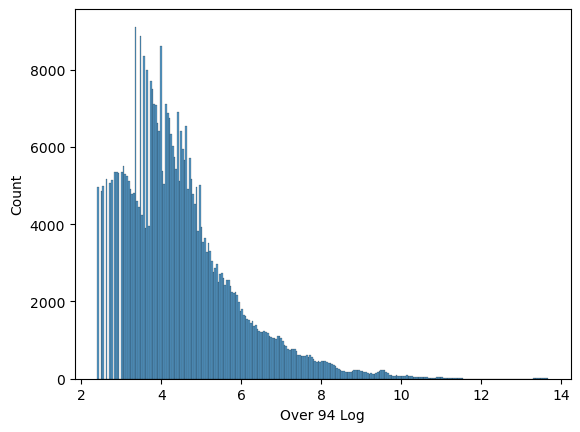

In [58]:
#Part 5
sns.histplot(data=medi,x='Over 94 Log')

<Axes: xlabel='under 25 Log', ylabel='Count'>

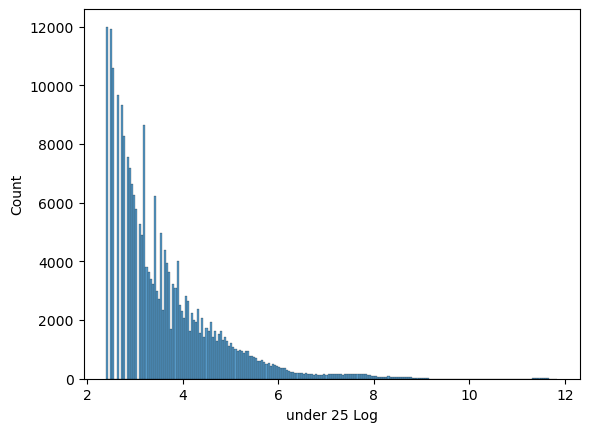

In [59]:
sns.histplot(data=medi,x='under 25 Log')

> The counts for both variables were so large that they had to be rescaled as my code would not even run before I rescaled it. This is most likely from the data in the US column which includes data from every state. 

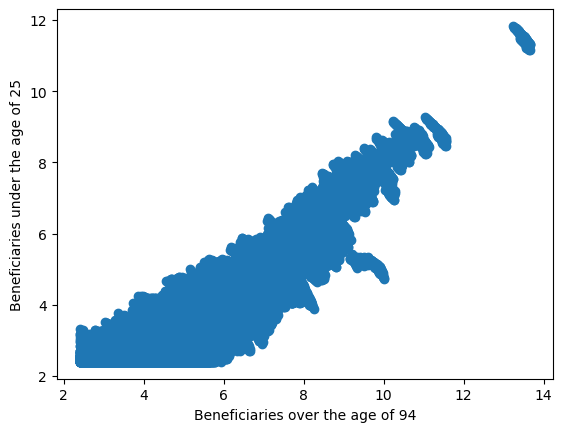

In [62]:
#Part 6
plt.scatter(data=medi, x='Over 94 Log', y='under 25 Log')
plt.xlabel("Beneficiaries over the age of 94")
plt.ylabel("Beneficiaries under the age of 25")
plt.show();

> There is a pretty clear correlation that in areas where more people over the age of 94 are on medicare, there are also more people under the age of 25 on medicare.

In [65]:
medi.loc[:,['AGE_GT_94_BENES','BENE_STATE_ABRVTN']].groupby('BENE_STATE_ABRVTN').describe()

AGE_GT_94_BENES                                         \
                            count           mean           std       min   
BENE_STATE_ABRVTN                                                          
AK                         1661.0     104.978326    179.841830       0.0   
AL                        10132.0     251.580734   1038.898381      11.0   
AR                        11195.0     147.960607    639.723467      11.0   
AS                          149.0      99.093960     17.910567      79.0   
AZ                         2316.0    1546.617012   3261.162895      11.0   
CA                         8476.0    3047.252596  11793.080619       0.0   
CO                         7308.0     359.572113   1271.776469       0.0   
CT                         1373.0    2424.935907   3251.745592     183.0   
DC                          298.0    2261.147651    193.973526    1787.0   
DE                          596.0     989.244966    669.166724     194.0   
FL                         9850.0    1609.124873   6584.369451      11.0   
FO                          149.0   15671.872483   3712.231250    9409.0   
GA                        21205.0     198.600896   1200.213987       0.0   
GU                          149.0     234.617450     31.554671     186.0   
HI                          817.0    1794.380661   2028.012788       0.0   
IA                        14876.0     179.133638    891.927319      11.0   
ID                         5334.0     163.858830    498.364555       0.0   
IL                        15074.0     604.922250   3272.656945      11.0   
IN                        13763.0     292.364964   1406.138934      11.0   
KS                        13232.0     158.647143    764.745543       0.0   
KY                        16772.0     134.760971    729.263787      11.0   
LA                         9553.0     274.257615   1096.652978      11.0   
MA                         2233.0    2574.589342   4621.811064      11.0   
MD                         3725.0    1056.645906   2605.776484      35.0   
ME                         2533.0     406.317805    789.019324      33.0   
MI                        12328.0     551.736697   2550.902273      11.0   
MN                        13025.0     309.300038   1468.683198      11.0   
MO                        16870.0     233.152875   1268.656875      11.0   
MP                          149.0      19.939597      3.626532      14.0   
MS                        12172.0     134.125534    601.350363       0.0   
MT                         5886.0     113.967040    361.514328       0.0   
NC                        14938.0     352.881510   1767.439624      11.0   
ND                         6179.0      96.774559    314.208474       0.0   
NE                        10498.0     129.242522    556.984217       0.0   
NH                         1639.0     580.442343    863.333051      77.0   
NJ                         3278.0    2124.911531   4720.593022     116.0   
NM                         4419.0     252.266350    696.640901      11.0   
NV                         1902.0     558.799685   1087.418874       0.0   
NY                         9387.0    1822.397465   7272.368047      13.0   
OH                        13261.0     602.802654   2860.147787      12.0   
OK                        10983.0     181.877356    796.542681      11.0   
OR                         5044.0     565.280333   1626.168002      11.0   
PA                        10076.0    1094.927948   4492.101183      11.0   
PR                        11602.0     343.946820   1541.119151      11.0   
RI                          894.0    1109.639821   1154.717299     166.0   
SC                         7003.0     385.095816   1303.083172      13.0   
SD                         7096.0     100.428833    351.461343       0.0   
TN                        13733.0     243.168645   1176.687619      11.0   
TX                        30234.0     371.972217   2708.575566       0.0   
UK                            0.0            NaN           NaN    

In [66]:
medi.loc[:,['AGE_LT_25_BENES','BENE_STATE_ABRVTN']].groupby('BENE_STATE_ABRVTN').describe()

AGE_LT_25_BENES                                       \
                            count          mean           std      min   
BENE_STATE_ABRVTN                                                        
AK                         2201.0     25.410722     55.355688      0.0   
AL                         7154.0     83.975538    300.055882     11.0   
AR                         6002.0     70.502166    239.757136      0.0   
AS                           73.0     14.109589      2.884642     11.0   
AZ                         1874.0    250.810566    458.618532      0.0   
CA                         7125.0    298.237754   1053.505355      0.0   
CO                         4286.0     57.553196    163.840997      0.0   
CT                         1373.0    228.957757    306.674524     24.0   
DC                          298.0    188.167785     60.031462     81.0   
DE                          596.0    139.994966     92.179866     33.0   
FL                         7324.0    218.715593    767.017100      0.0   
FO                          149.0    172.657718     23.937354    113.0   
GA                        10055.0     75.717056    335.640771      0.0   
GU                          149.0     28.302013      3.977478     20.0   
HI                          764.0     86.570681     84.627107      0.0   
IA                         4289.0     69.978783    213.674346      0.0   
ID                         2701.0     68.943354    153.993831      0.0   
IL                         7373.0    141.585243    544.132667      0.0   
IN                         7987.0     81.916990    315.836942      0.0   
KS                         6566.0     42.734998    159.367079      0.0   
KY                         8822.0     64.459080    270.986546      0.0   
LA                         6146.0     91.205174    301.261097      0.0   
MA                         1945.0    446.920308    743.383430      0.0   
MD                         3122.0    145.636131    326.705692     11.0   
ME                         2488.0    102.249196    195.888792     11.0   
MI                         8797.0    143.474139    571.038574      0.0   
MN                         6263.0     76.763372    264.425375      0.0   
MO                         8915.0     83.874369    343.572472      0.0   
MP                           11.0     11.909091      0.301511     11.0   
MS                         6822.0     50.375257    183.902216      0.0   
MT                         3909.0     20.918905     61.412580      0.0   
NC                        10648.0     88.078418    380.422893      0.0   
ND                         4143.0     13.248371     42.413571      0.0   
NE                         4632.0     34.918826    114.795718      0.0   
NH                         1639.0    143.497865    215.465501     16.0   
NJ                         3272.0    204.868888    456.771131     13.0   
NM                         2583.0     67.813782    148.724668      0.0   
NV                         1265.0    131.539130    210.908141      0.0   
NY                         8707.0    192.286781    738.753444      0.0   
OH                        10557.0    117.626504    504.384848     11.0   
OK                         6026.0     70.016097    235.634005      0.0   
OR                         3530.0    106.345609    256.364380      0.0   
PA                         8829.0    149.793408    581.716032      0.0   
PR                         6849.0     44.622135    165.951808      0.0   
RI                          880.0    156.004545    171.191508     11.0   
SC                         5077.0     84.088241    245.898591      0.0   
SD                         4128.0     16.210271     53.878669      0.0   
TN                         9077.0     73.129338    297.795122      0.0   
TX                        18568.0    104.328037    617.032529      0.0   
UK                            0.0           NaN           NaN      NaN   
US                          149.0  98623.402685  14355.501311  69447.0   
UT                    

> I see that across almost every state, the average number of beneficiaries is substantially higher among those age 94 and older than those under the age of 25. This makes sense since older people are in more need of medical help and thus insurance than younger people. 

In [67]:
! git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   .ipynb_checkpoints/assignment-checkpoint.ipynb
	modified:   assignment.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/assignment_naylorstone-checkpoint.ipynb
	assignment_naylorstone.ipynb
	data/Medicare Monthly Enrollment Data_Sept2024.csv
	data/cbo_data.csv
	data/untitled.txt

no changes added to commit (use "git add" and/or "git commit -a")


In [68]:
! git add assignment_naylorstone.ipynb

In [69]:
! git add data/Medicare Monthly Enrollment Data_Sept2024.csv

fatal: pathspec 'data/Medicare' did not match any files


In [70]:
! git add data/cbo_data.csv

In [71]:
! git status

On branch main
Your branch is up to date with 'origin/main'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	new file:   assignment_naylorstone.ipynb
	new file:   data/cbo_data.csv

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   .ipynb_checkpoints/assignment-checkpoint.ipynb
	modified:   assignment.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/assignment_naylorstone-checkpoint.ipynb
	data/Medicare Monthly Enrollment Data_Sept2024.csv
	data/untitled.txt



In [72]:
! git commit -m "assignment submission files"

[main 137f8f3] assignment submission files
 2 files changed, 5591 insertions(+)
 create mode 100644 assignment/assignment_naylorstone.ipynb
 create mode 100644 assignment/data/cbo_data.csv


In [76]:
! git push

Username for 'https://github.com': ^C
